In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Getting data ready

In [ ]:
# Read DataFrames
df_products = pd.read_csv('olist_products_dataset.csv')
df_product_category_translation = pd.read_csv('product_category_name_translation.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Merge DataFrames
df_products_merged = df_products.merge(df_product_category_translation, on='product_category_name', how='left')
df_order_items_merged = df_order_items.merge(df_products_merged, on='product_id', how='left')
df_orders_merged = df_orders.merge(df_customers, on='customer_id', how='left')
df_merged = df_order_items_merged.merge(df_orders_merged, on='order_id', how='left')

# Calculate sales volume and revenue per category
category_sales = df_merged.groupby(['product_category_name_english', 'customer_state']).agg({'order_id': 'count', 'price': 'sum'}).reset_index()
category_sales.columns = ['product_category', 'customer_state', 'sales_volume', 'revenue']

# Sort by sales_volume and revenue
category_sales_sorted = category_sales.sort_values(by=['sales_volume', 'revenue'], ascending=False)

In [ ]:
# Sort by sales_volume and revenue
category_sales_sorted = category_sales.sort_values(by=['sales_volume', 'revenue'], ascending=False)
sales_by_region = category_sales_sorted.pivot_table(index='product_category', columns='customer_state', values=['sales_volume', 'revenue'], fill_value=0)

# Flatten the multi-level column index
sales_by_region.columns = ['_'.join(col) for col in sales_by_region.columns]

# Reset the index of sales_by_region DataFrame
sales_by_region_reset = sales_by_region.reset_index()

# Extract revenue and sales_volume columns
revenue_columns = [col for col in sales_by_region_reset.columns if 'revenue' in col]
sales_volume_columns = [col for col in sales_by_region_reset.columns if 'sales_volume' in col]

# Create DataFrames with only 'revenue' and 'sales_volume' columns
revenue_df = sales_by_region_reset[['product_category'] + revenue_columns]

In [ ]:
# Merge the DataFrames
merged_data = (
    df_orders.merge(df_order_items, on='order_id')
    .merge(df_products, on='product_id')
    .merge(df_order_reviews, on='order_id')
    .merge(df_product_category_translation, on='product_category_name')
)

# Group by product_category_name_english, seller_id, and review_score
review_score_distribution = merged_data.groupby(['product_category_name_english', 'seller_id', 'review_score']).size().reset_index(name='count')

def categorize_product_category(category):
    category_mapping = {
    'Home & Furniture': ['bed_bath_table', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_comfort_2', 'home_construction', 'housewares'],
    'Electronics & Computers': ['audio', 'computers', 'computers_accessories', 'electronics', 'telephony', 'tablets_printing_image', 'fixed_telephony'],
    'Fashion': ['fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach'],
    'Entertainment': ['art', 'arts_and_craftmanship', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'consoles_games', 'cool_stuff', 'cine_photo', 'dvds_blu_ray', 'music', 'musical_instruments', 'toys', 'watches_gifts'],
    'Sports & Leisure': ['sports_leisure', 'garden_tools'],
    'Health & Beauty': ['health_beauty', 'perfumery'],
    'Baby & Kids': ['baby', 'diapers_and_hygiene', 'fashion_childrens_clothes'],
    'Office & Industry': ['agro_industry_and_commerce', 'industry_commerce_and_business', 'office_furniture', 'stationery'],
    'Home Appliances': ['air_conditioning', 'home_appliances', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee'],
    'Tools & Construction': ['construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'costruction_tools_garden', 'costruction_tools_tools'],
    'Auto & Accessories': ['auto'],
    'Food & Drink': ['food', 'food_drink', 'drinks'],
    'Miscellaneous': ['flowers', 'la_cuisine', 'luggage_accessories', 'market_place', 'party_supplies', 'pet_shop', 'security_and_services', 'signaling_and_security'],
}
    for key, values in category_mapping.items():
        if category in values:
            return key
    return 'Unknown'

review_score_distribution['product_category_group'] = review_score_distribution['product_category_name_english'].apply(categorize_product_category)

def categorize_review_score(score):
    if score >= 4:
        return 'Positive'
    else:
        return 'Negative'

review_score_distribution['review_category'] =\
review_score_distribution['review_score'].apply(categorize_review_score)

In [ ]:
# Set your desired product category
selected_product_category = 'health_beauty'

# Filter the revenue_df to get the row with the selected product category
category_data = revenue_df.loc[revenue_df['product_category'] == selected_product_category]

# Drop the product_category column to have only state-revenue pairs
state_revenue_pairs = category_data.drop(columns=['product_category'])

# Transpose the DataFrame and reset the index to have state and revenue as columns
state_revenue_pairs = state_revenue_pairs.T.reset_index()

# Rename the columns
state_revenue_pairs.columns = ['state', 'revenue']

# Display the state-revenue pairs for the selected product category
state_revenue_pairs

,state,revenue
0,revenue_AC,1386.58
1,revenue_AL,12780.26
2,revenue_AM,2776.03
3,revenue_AP,1380.58
4,revenue_BA,51367.91
5,revenue_CE,32419.18
6,revenue_DF,29862.82
7,revenue_ES,20214.49
8,revenue_GO,28312.30
9,revenue_MA,12747.18


In [ ]:
result = review_score_distribution.groupby(['product_category_group', 'review_category']).agg({'count': 'sum'}).reset_index()

# Display the result
result

,product_category_group,review_category,count
0,Auto & Accessories,Negative,965
1,Auto & Accessories,Positive,3248
2,Baby & Kids,Negative,790
3,Baby & Kids,Positive,2297
4,Electronics & Computers,Negative,4231
5,Electronics & Computers,Positive,11788
6,Entertainment,Negative,3844
7,Entertainment,Positive,13211
8,Fashion,Negative,579
9,Fashion,Positive,2071


In [ ]:
result['review_ratio'] = result.groupby('product_category_group')['count'].transform(lambda x: x / x.sum())

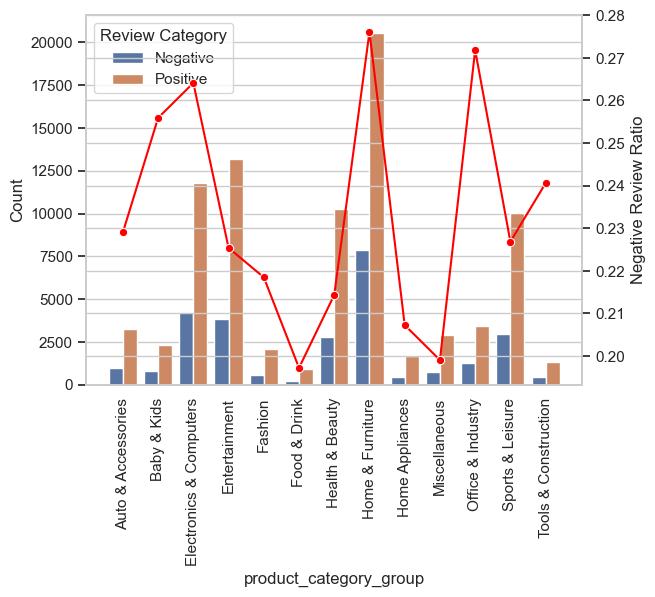

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot for counts
ax1 = sns.barplot(x="product_category_group", y="count", hue="review_category", data=result)

# Set x-axis label rotation
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis
ax2 = ax1.twinx()

# Filter results for negative review_category
negative_results = result[result["review_category"] == "Negative"]

# Create a line plot for negative review ratios
ax2 = sns.lineplot(x="product_category_group", y="review_ratio", data=negative_results, ax=ax2, marker="o", color="red")

# Set y-axis labels
ax1.set_ylabel("Count")
ax2.set_ylabel("Negative Review Ratio")

# Set the legend
ax1.legend(title="Review Category", loc="upper left")
#ax2.get_legend().remove()

# Show the plot
plt.show()